<a href="https://colab.research.google.com/github/CarlosEstellita/Image-Processing-First-Steps/blob/main/Medical%20Images%20-%20Thresholding/B%C3%A1sidoDoB%C3%A1sico_Threshold_pt4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Básico do Básico - Segmentação de imagens com limiarização (pt. 4)

##Importando as bibliotecas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt #para plotar as imagens
import matplotlib.image as mpimg #para importar as imagens
import skimage.io #também para plotar imagens
import numpy as np #para trabalhar com as imagens
import sys
from matplotlib import rcParams #mudar os parâmetros das imagens
from skimage.filters import threshold_otsu #função que faz limiarização
from skimage.color import rgb2gray #função que converte imagens em RGB para escala de cinzas
from skimage import exposure #exposição
from skimage.exposure import histogram #função de fazer histogramas do skimage
from skimage.transform import rescale #reescalar o histograma

##Limiarização comum

###Importando e plotando as imagens

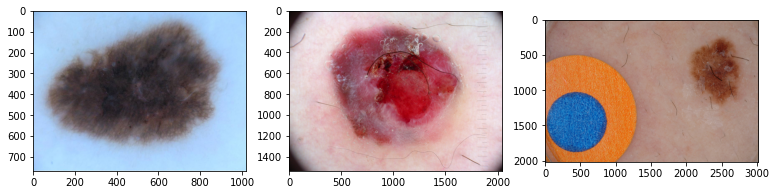

In [2]:
img1 = mpimg.imread('ISIC_0000000.jpg')
img2 = mpimg.imread('ISIC_0000146.jpg')
img3 = mpimg.imread('ISIC_0000999.jpg')

rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(1, 3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

###Convertendo em escalas de cinza, definindo o novo limiar das imagens e retornando o valor do limiar de Otsu

In [3]:
#Primeira imagem
img1_gray = rgb2gray(img1)
thresh1_img1 = threshold_otsu(img1_gray)
binary1_img1 = img1_gray > thresh1_img1
print("Benígno: ", threshold_otsu(img1_gray))

#Segunda imagem
img2_gray = rgb2gray(img2)
thresh2_img2 = threshold_otsu(img2_gray)
binary2_img2 = img2_gray > thresh2_img2
print("Benígno: ", threshold_otsu(img2_gray))

#Terceira imagem
img3_gray = rgb2gray(img3)
thresh3_img3 = threshold_otsu(img3_gray)
binary3_img3 = img3_gray > thresh3_img3
print("Benígno: ", threshold_otsu(img3_gray))

Benígno:  0.523509276194853
Benígno:  0.5589423445159314
Benígno:  0.4479915134803921


###Plotando a versão binarizada

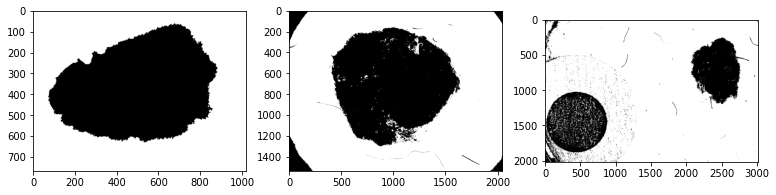

In [4]:
rcParams['figure.figsize'] = 13, 10
fig, ax = plt.subplots(1, 3)

ax[0].imshow(binary1_img1, cmap='gray')
ax[1].imshow(binary2_img2, cmap='gray')
ax[2].imshow(binary3_img3, cmap='gray')

###Plotando a versão em escala de cinzas

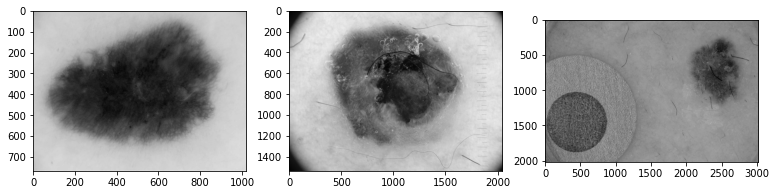

In [5]:
rcParams['figure.figsize'] = 13, 10
fig, ax = plt.subplots(1, 3)

ax[0].imshow(img1_gray, cmap='gray')
ax[1].imshow(img2_gray, cmap='gray')
ax[2].imshow(img3_gray, cmap='gray')

###Plotando os histogramas das escalas de cinzas

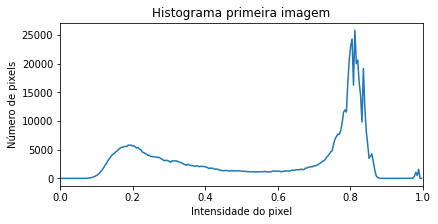

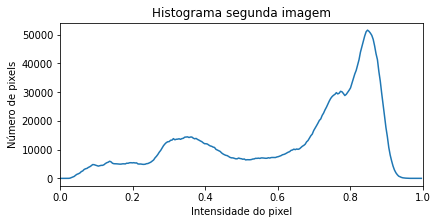

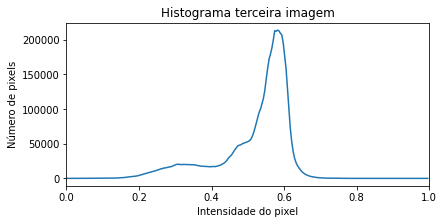

In [6]:
rcParams['figure.figsize'] = 6.5, 3

#Histograma primeira imagem
histogram1, bin_edges = np.histogram(img1_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma primeira imagem")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram1)

#Histograma segunda imagem
histogram2, bin_edges = np.histogram(img2_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma segunda imagem")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram2)

#Histograma terceira imagem
histogram3, bin_edges = np.histogram(img3_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma terceira imagem")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram3)

##Limiarização com equalização

###Equalizando as imagens e em seguida plotando as normais e equalizadas

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


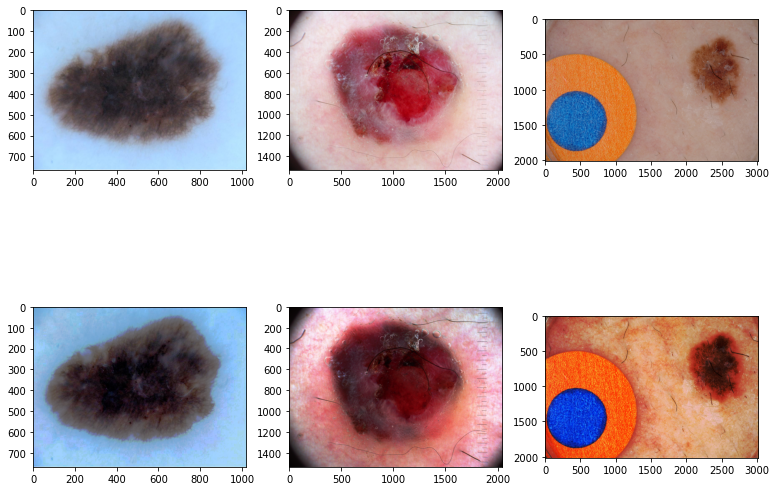

In [7]:
img1_equalized = exposure.equalize_hist(img1)
img2_equalized = exposure.equalize_hist(img2)
img3_equalized = exposure.equalize_hist(img3)

rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(img1)
ax[1,0].imshow(img1_equalized)
ax[0,1].imshow(img2)
ax[1,1].imshow(img2_equalized)
ax[0,2].imshow(img3)
ax[1,2].imshow(img3_equalized)

###Convertendo em escalas de cinzas, definindo o novo limiar das imagens e retornando o valor do limiar de Otsu

In [8]:
#Convertendo a primeira imagem
img1_equalized_gray = rgb2gray(img1_equalized)
thresh4_img1 = threshold_otsu(img1_equalized_gray)
binary4_img1 = img1_equalized_gray > thresh4_img1
print("Primeira: ", threshold_otsu(img1_equalized_gray))

#Convertendo a segunda imagem
img2_equalized_gray = rgb2gray(img2_equalized)
thresh5_img2 = threshold_otsu(img2_equalized_gray)
binary5_img2 = img2_equalized_gray > thresh5_img2
print("Segunda: ", threshold_otsu(img2_equalized_gray))

#Convertendo a terceira imagem
img3_equalized_gray = rgb2gray(img3_equalized)
thresh6_img3 = threshold_otsu(img3_equalized_gray)
binary6_img3 = img3_equalized_gray > thresh6_img3
print("Terceira: ", threshold_otsu(img3_equalized_gray))

Primeira:  0.45508854909388735
Segunda:  0.43631540696751336
Terceira:  0.45201454280046893


###Plotando a limiarização normal e equalizada

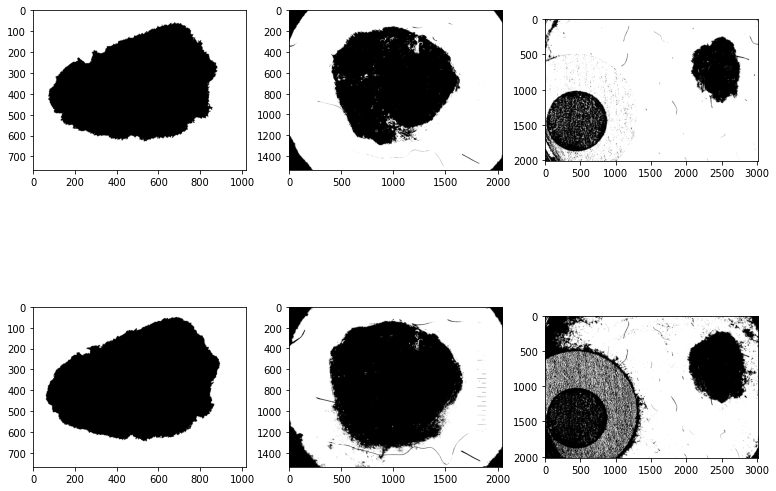

In [9]:
rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(binary1_img1, cmap='gray')
ax[1,0].imshow(binary4_img1, cmap='gray')
ax[0,1].imshow(binary2_img2, cmap='gray')
ax[1,1].imshow(binary5_img2, cmap='gray')
ax[0,2].imshow(binary3_img3, cmap='gray')
ax[1,2].imshow(binary6_img3, cmap='gray')

###Plotando a versão em escala de cinzas normais e equalizadas

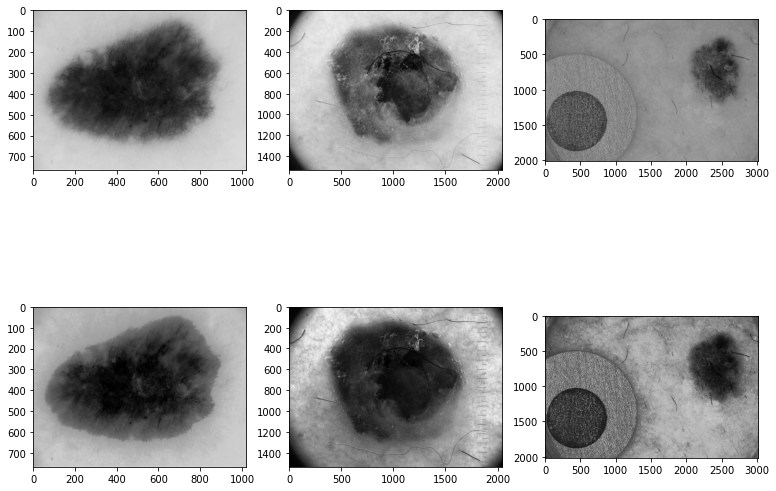

In [10]:
rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(img1_gray, cmap='gray')
ax[1,0].imshow(img1_equalized_gray, cmap='gray')
ax[0,1].imshow(img2_gray, cmap='gray')
ax[1,1].imshow(img2_equalized_gray, cmap='gray')
ax[0,2].imshow(img3_gray, cmap='gray')
ax[1,2].imshow(img3_equalized_gray, cmap='gray')

###Plotando os histogramas da imagens equalizadas em escala de cinzas

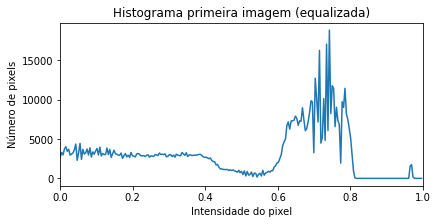

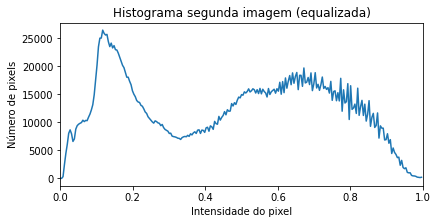

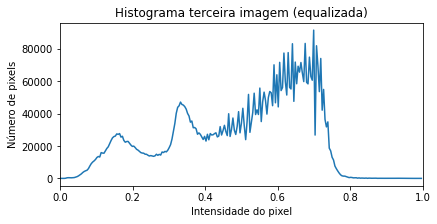

In [11]:
rcParams['figure.figsize'] = 6.5, 3

#Histograma primeira imagem (equalizada)
histogram4, bin_edges = np.histogram(img1_equalized_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma primeira imagem (equalizada)")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram4)

#Histograma segunda imagem (equalizada)
histogram5, bin_edges = np.histogram(img2_equalized_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma segunda imagem (equalizada)")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram5)

#Histograma terceira imagem (equalizada)
histogram6, bin_edges = np.histogram(img3_equalized_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma terceira imagem (equalizada)")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram6)

##Limiarização CLAHE

###Equalização adaptativa e em seguida plotando as imagens originais e CLAHE

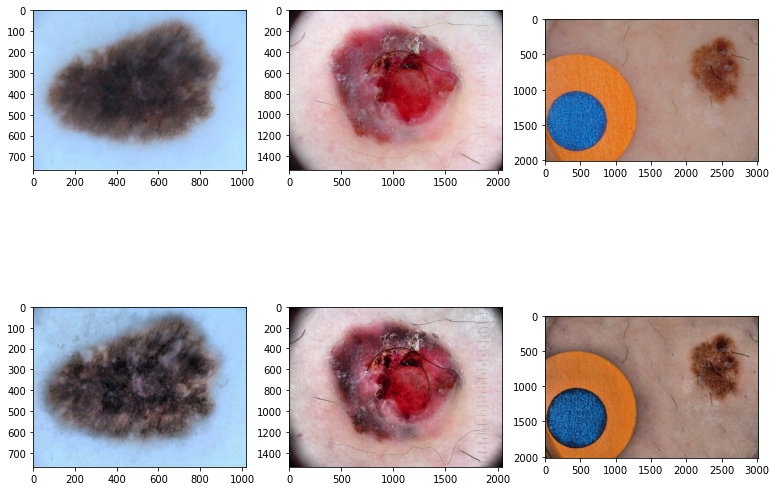

In [12]:
img1_clahe = exposure.equalize_adapthist(img1)
img2_clahe = exposure.equalize_adapthist(img2)
img3_clahe = exposure.equalize_adapthist(img3)

rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(img1)
ax[1,0].imshow(img1_clahe)
ax[0,1].imshow(img2)
ax[1,1].imshow(img2_clahe)
ax[0,2].imshow(img3)
ax[1,2].imshow(img3_clahe)

###Convertendo em escala de cinzas, definindo o novo limiar da imagens e retornando o valor do limiar de Otsu

In [13]:
#Convertendo a primeira imagem
img1_clahe_gray = rgb2gray(img1_clahe)
thresh7_img1 = threshold_otsu(img1_clahe_gray)
binary7_img1 = img1_clahe_gray > thresh7_img1
print("Primeira: ", threshold_otsu(img1_clahe_gray))

#Convertendo a segunda imagem
img2_clahe_gray = rgb2gray(img2_clahe)
thresh8_img2 = threshold_otsu(img2_clahe_gray)
binary8_img2 = img2_clahe_gray > thresh8_img2
print("Segunda: ", threshold_otsu(img2_clahe_gray))

#Convertendo a terceira imagem
img3_clahe_gray = rgb2gray(img3_clahe)
thresh9_img3 = threshold_otsu(img3_clahe_gray)
binary9_img3 = img3_clahe_gray > thresh9_img3
print("Terceira: ", threshold_otsu(img3_clahe_gray))

Primeira:  0.5109691658381768
Segunda:  0.5128984078257239
Terceira:  0.4045992966083295


###Plotando as limiarizações originais e CLAHE

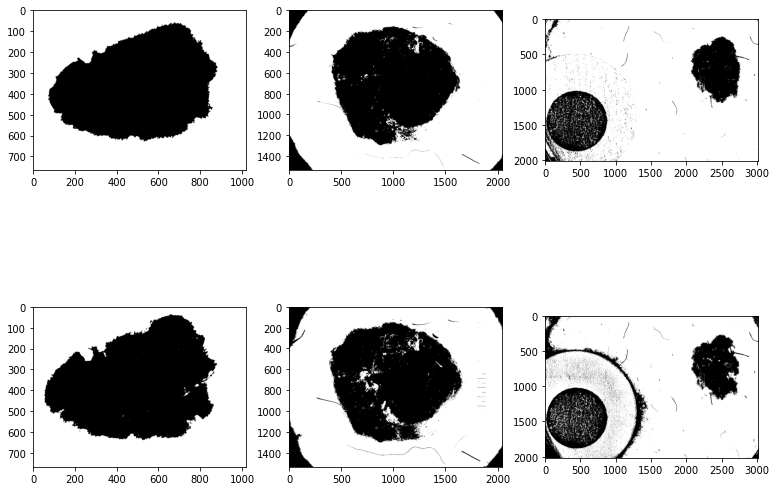

In [14]:
rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(binary1_img1, cmap='gray')
ax[1,0].imshow(binary7_img1, cmap='gray')
ax[0,1].imshow(binary2_img2, cmap='gray')
ax[1,1].imshow(binary8_img2, cmap='gray')
ax[0,2].imshow(binary3_img3, cmap='gray')
ax[1,2].imshow(binary9_img3, cmap='gray')

###Plotando as imagens originais e CLAHE em escala de cinzas

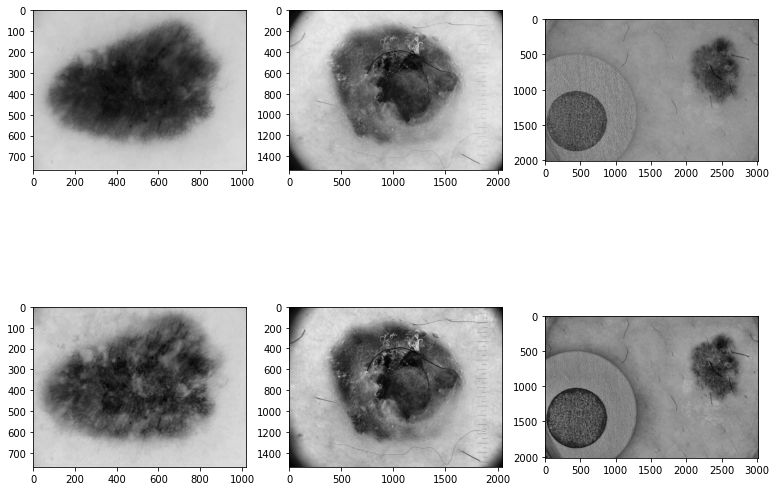

In [15]:
rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(img1_gray, cmap='gray')
ax[1,0].imshow(img1_clahe_gray, cmap='gray')
ax[0,1].imshow(img2_gray, cmap='gray')
ax[1,1].imshow(img2_clahe_gray, cmap='gray')
ax[0,2].imshow(img3_gray, cmap='gray')
ax[1,2].imshow(img3_clahe_gray, cmap='gray')

###Plotando os histogramas das escalas de cinza CLAHE

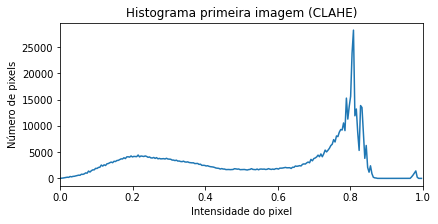

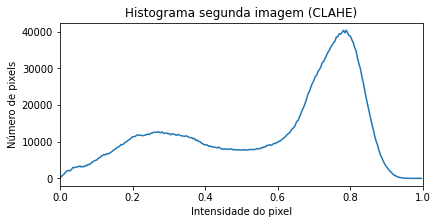

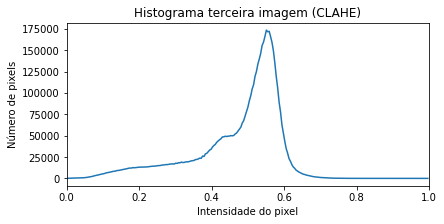

In [16]:
rcParams['figure.figsize'] = 6.5, 3

#Histograma primeira imagem (equalizada)
histogram7, bin_edges = np.histogram(img1_clahe_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma primeira imagem (CLAHE)")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram7)

#Histograma segunda imagem (equalizada)
histogram8, bin_edges = np.histogram(img2_clahe_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma segunda imagem (CLAHE)")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram8)

#Histograma terceira imagem (equalizada)
histogram9, bin_edges = np.histogram(img3_clahe_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma terceira imagem (CLAHE)")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram9)

##Intersection Over Union (IoU)

###Importando e plotando as mascaras

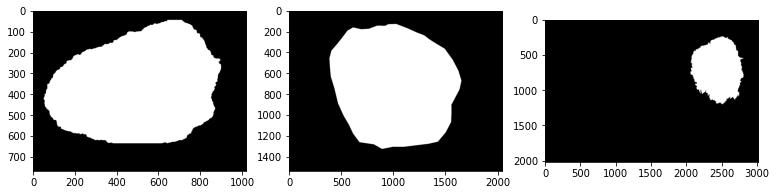

In [17]:
img1_gt = mpimg.imread('ISIC_0000000_Segmentation.png')
img2_gt = mpimg.imread('ISIC_0000146_Segmentation.png')
img3_gt = mpimg.imread('ISIC_0000999_Segmentation.png')

rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(1, 3)
ax[0].imshow(img1_gt, cmap='gray')
ax[1].imshow(img2_gt, cmap='gray')
ax[2].imshow(img3_gt, cmap='gray')

###Plotando todas as imagens binarizadas adquiridas

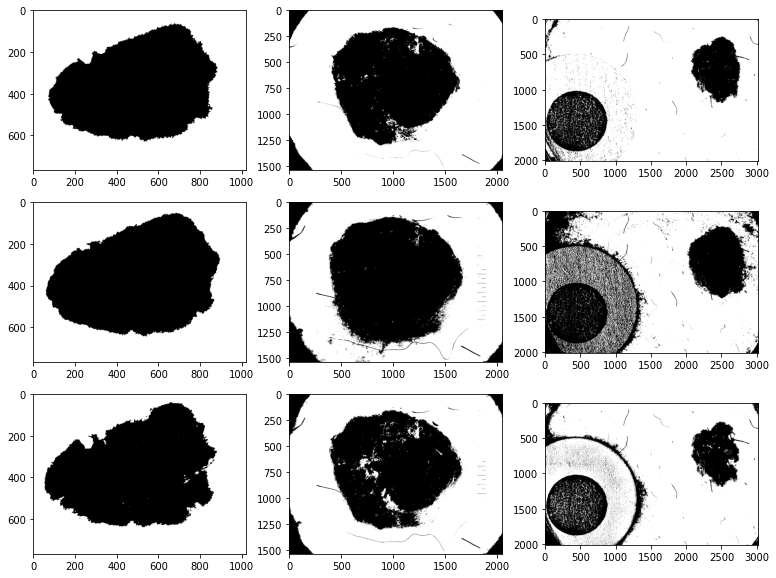

In [18]:
rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(3, 3)
ax[0,0].imshow(binary1_img1, cmap='gray')
ax[0,1].imshow(binary2_img2, cmap='gray')
ax[0,2].imshow(binary3_img3, cmap='gray')
ax[1,0].imshow(binary4_img1, cmap='gray')
ax[1,1].imshow(binary5_img2, cmap='gray')
ax[1,2].imshow(binary6_img3, cmap='gray')
ax[2,0].imshow(binary7_img1, cmap='gray')
ax[2,1].imshow(binary8_img2, cmap='gray')
ax[2,2].imshow(binary9_img3, cmap='gray')

###Trocando o threshold das imagens

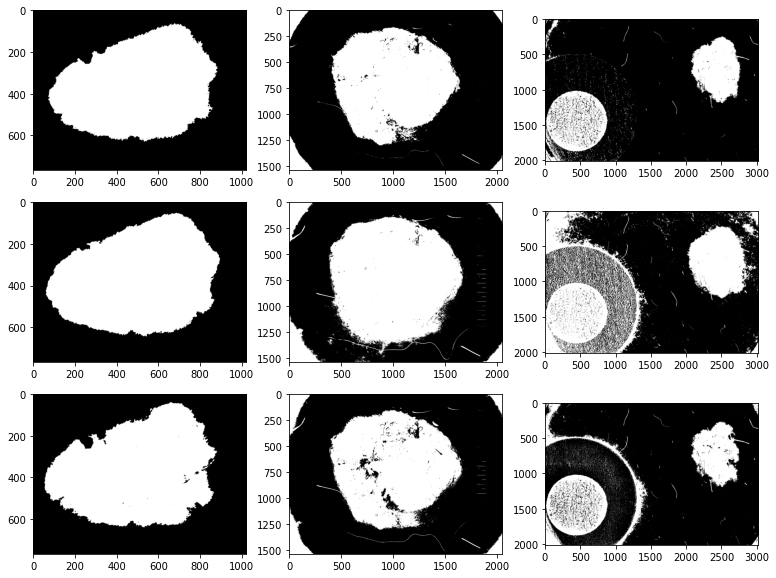

In [19]:
#Primeira imagem (normal)
img1_gray = rgb2gray(img1)
thresh1_img1 = threshold_otsu(img1_gray)
binary1_img1 = img1_gray <= thresh1_img1

#Segunda imagem (normal)
img2_gray = rgb2gray(img2)
thresh2_img2 = threshold_otsu(img2_gray)
binary2_img2 = img2_gray <= thresh2_img2

#Terceira imagem (normal)
img3_gray = rgb2gray(img3)
thresh3_img3 = threshold_otsu(img3_gray)
binary3_img3 = img3_gray <= thresh3_img3

#Primeira imagem (equalizada)
img1_equalized_gray = rgb2gray(img1_equalized)
thresh4_img1 = threshold_otsu(img1_equalized_gray)
binary4_img1 = img1_equalized_gray <= thresh4_img1

#Segunda imagem (equalizada)
img2_equalized_gray = rgb2gray(img2_equalized)
thresh5_img2 = threshold_otsu(img2_equalized_gray)
binary5_img2 = img2_equalized_gray <= thresh5_img2

#Terceira imagem (equalizada)
img3_equalized_gray = rgb2gray(img3_equalized)
thresh6_img3 = threshold_otsu(img3_equalized_gray)
binary6_img3 = img3_equalized_gray <= thresh6_img3

#Primeira imagem (CLAHE)
img1_clahe_gray = rgb2gray(img1_clahe)
thresh7_img1 = threshold_otsu(img1_clahe_gray)
binary7_img1 = img1_clahe_gray <= thresh7_img1

#Segunda imagem (CLAHE)
img2_clahe_gray = rgb2gray(img2_clahe)
thresh8_img2 = threshold_otsu(img2_clahe_gray)
binary8_img2 = img2_clahe_gray <= thresh8_img2

#Teceira imagem (CLAHE)
img3_clahe_gray = rgb2gray(img3_clahe)
thresh9_img3 = threshold_otsu(img3_clahe_gray)
binary9_img3 = img3_clahe_gray <= thresh9_img3

rcParams['figure.figsize'] = 13, 10
fig, ax = plt.subplots(3, 3)
ax[0,0].imshow(binary1_img1, cmap='gray')
ax[0,1].imshow(binary2_img2, cmap='gray')
ax[0,2].imshow(binary3_img3, cmap='gray')
ax[1,0].imshow(binary4_img1, cmap='gray')
ax[1,1].imshow(binary5_img2, cmap='gray')
ax[1,2].imshow(binary6_img3, cmap='gray')
ax[2,0].imshow(binary7_img1, cmap='gray')
ax[2,1].imshow(binary8_img2, cmap='gray')
ax[2,2].imshow(binary9_img3, cmap='gray')

###Plotando as IoU das imagens normais

IoU - Limiarização normal - imagem1: 0.8629862229967448
IoU - Limiarização normal - imagem2: 0.7745401561803557
IoU - Limiarização normal - imagem3: 0.4056424577999473



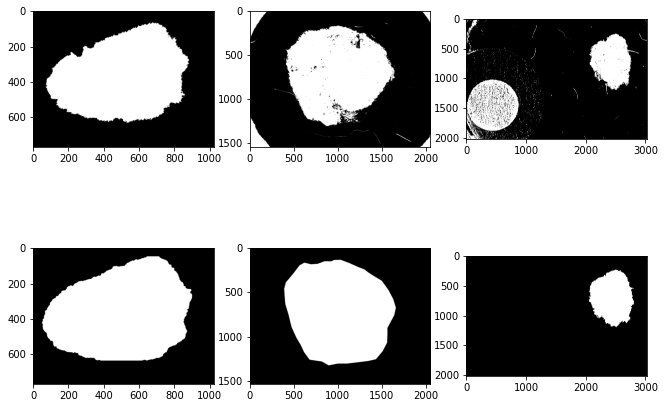

In [23]:
rcParams['figure.figsize'] = 11, 8

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(binary1_img1, cmap='gray')
ax[0,1].imshow(binary2_img2, cmap='gray')
ax[0,2].imshow(binary3_img3, cmap='gray')
ax[1,0].imshow(img1_gt, cmap='gray')
ax[1,1].imshow(img2_gt, cmap='gray')
ax[1,2].imshow(img3_gt, cmap='gray')

intersection1 = np.logical_and(img1_gt, binary1_img1)
union1 = np.logical_or(img1_gt, binary1_img1)
iou_score1 = np.sum(intersection1) / np.sum(union1)
print("IoU - Limiarização normal - imagem1: %s" % iou_score1)

intersection2 = np.logical_and(img2_gt, binary2_img2)
union2 = np.logical_or(img2_gt, binary2_img2)
iou_score2 = np.sum(intersection2) / np.sum(union2)
print("IoU - Limiarização normal - imagem2: %s" % iou_score2)

intersection3 = np.logical_and(img3_gt, binary3_img3)
union4 = np.logical_or(img3_gt, binary3_img3)
iou_score4 = np.sum(intersection3) / np.sum(union4)
print("IoU - Limiarização normal - imagem3: %s" % iou_score4)

print()

###Plotando as IoU das imagens equalizadas

IoU - Limiarização equalizada - imagem1: 0.9415131333932132
IoU - Limiarização equalizada - imagem2: 0.8001220495452473
IoU - Limiarização equalizada - imagem3: 0.22583566376376815



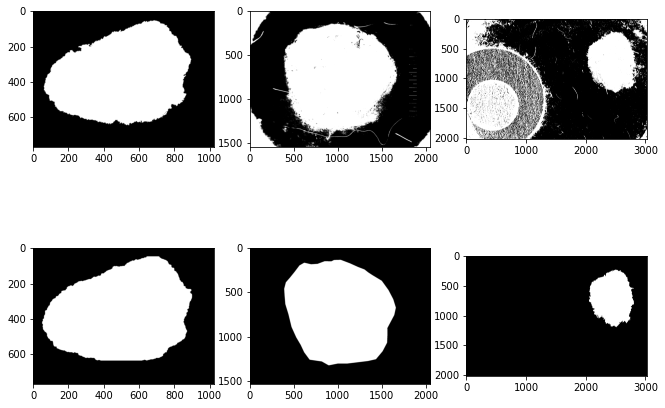

In [24]:
rcParams['figure.figsize'] = 11, 8

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(binary4_img1, cmap='gray')
ax[0,1].imshow(binary5_img2, cmap='gray')
ax[0,2].imshow(binary6_img3, cmap='gray')
ax[1,0].imshow(img1_gt, cmap='gray')
ax[1,1].imshow(img2_gt, cmap='gray')
ax[1,2].imshow(img3_gt, cmap='gray')

intersection4 = np.logical_and(img1_gt, binary4_img1)
union4 = np.logical_or(img1_gt, binary4_img1)
iou_score4 = np.sum(intersection4) / np.sum(union4)
print("IoU - Limiarização equalizada - imagem1: %s" % iou_score4)

intersection5 = np.logical_and(img2_gt, binary5_img2)
union5 = np.logical_or(img2_gt, binary5_img2)
iou_score5 = np.sum(intersection5) / np.sum(union5)
print("IoU - Limiarização equalizada - imagem2: %s" % iou_score5)

intersection6 = np.logical_and(img3_gt, binary6_img3)
union6 = np.logical_or(img3_gt, binary6_img3)
iou_score6 = np.sum(intersection6) / np.sum(union6)
print("IoU - Limiarização equalizada - imagem3: %s" % iou_score6)

print()

###Plotando as IoU das imagens CLAHE

IoU - Limiarização equalizada - imagem1: 0.9116790417196537
IoU - Limiarização equalizada - imagem2: 0.7559432602828942
IoU - Limiarização equalizada - imagem3: 0.22583566376376815



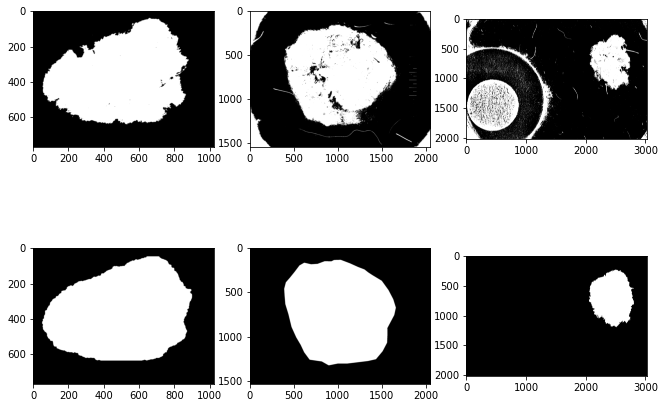

In [25]:
rcParams['figure.figsize'] = 11, 8

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(binary7_img1, cmap='gray')
ax[0,1].imshow(binary8_img2, cmap='gray')
ax[0,2].imshow(binary9_img3, cmap='gray')
ax[1,0].imshow(img1_gt, cmap='gray')
ax[1,1].imshow(img2_gt, cmap='gray')
ax[1,2].imshow(img3_gt, cmap='gray')

intersection7 = np.logical_and(img1_gt, binary7_img1)
union7 = np.logical_or(img1_gt, binary7_img1)
iou_score7 = np.sum(intersection7) / np.sum(union7)
print("IoU - Limiarização equalizada - imagem1: %s" % iou_score7)

intersection8 = np.logical_and(img2_gt, binary8_img2)
union8 = np.logical_or(img2_gt, binary8_img2)
iou_score8 = np.sum(intersection8) / np.sum(union8)
print("IoU - Limiarização equalizada - imagem2: %s" % iou_score8)

intersection9 = np.logical_and(img3_gt, binary6_img3)
union9 = np.logical_or(img3_gt, binary6_img3)
iou_score9 = np.sum(intersection9) / np.sum(union9)
print("IoU - Limiarização equalizada - imagem3: %s" % iou_score9)

print()